In [1]:
import numpy as np
import statistics as stats
import seaborn as sns
%matplotlib inline

# Basics
* Range = max - min
* Midrange = average of max and min

In [2]:
a = np.random.randint(0, 1000, 5)
a = np.append(a, a[0])  # Repeat first element
a = np.append(a, 2000)  # Add outlier

In [3]:
range_ = np.ptp(a)
midrange = (np.max(a) + np.min(a)) / 2
avg = np.mean(a)
median = np.median(a)
mode = stats.mode(a)

print('sorted a: %s' % sorted(a))
print('range: %d, midrange: %f, avg: %f, median: %d, mode: %d' % (range_, midrange, avg, median, mode))

sorted a: [562, 651, 734, 812, 812, 839, 2000]
range: 1438, midrange: 1281.000000, avg: 915.714286, median: 812, mode: 812


## Notes:
* Mean is more sensitive to outliers than median
* There's no mode if multiple values occur most often
* Median won't change even if values other than the middle change

# IQR (Interquartile Range) & Outliers
* IQR = (median of the large half) - (median of small half)
* Outlier is either (outlier < Q1 - 1.5 x IQR) or (Q3 + 1.5 x IQR < outlier)

In [4]:
def get_iqr(a):
    a = sorted(a)
    len_a = len(a)
    if len_a % 2 == 0:
        half_point = int(len_a / 2)
        q25 = np.median(a[0: half_point])
        q75 = np.median(a[half_point: ])
    else:
        half_point = int((len_a - 1) / 2)
        q25 = np.median(a[0: half_point])
        q75 = np.median(a[half_point + 1: ])
    return q75 - q25

In [5]:
get_iqr(a)

188.0

## Numpy's implementation has different values!?
https://stackoverflow.com/questions/42838554/np-percentile-not-equal-to-quartiles

In [6]:
q75, q25 = np.percentile(a, (75 , 25))
iqr = q75 - q25
iqr

133.0

In [7]:
q75, q25 = np.percentile(a, (75 , 25), interpolation='midpoint')
iqr = q75 - q25
iqr

133.0

# Box Plot

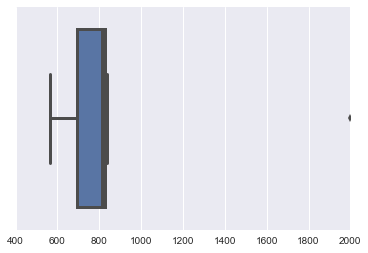

In [8]:
ax = sns.boxplot(x=a, linewidth=3)

# Variance, Standard Deviation, & Z-score
* Variance is the average of squared difference b/w each value and average
* Std = variance ^ (1/2)
* Z-score: how many standard deviation is the value away from the average?

In [9]:
var = np.var(a)
std = np.std(a)
print('variance: %f, standard deviation: %f' % (var, std))

variance: 204468.775510, standard deviation: 452.182237


## Notes:
* Standard Deviation goes with Mean (good for data without outliers)
* IQR goes with Median (good for data with outliers)
* Sample variance: divide by n - 1 instead of n

In [10]:
sample_var = np.var(a, ddof=1)
sample_std = np.std(a, ddof=1)
print('sample variance: %f, sample standard deviation: %f' % (sample_var, sample_std))

sample variance: 238546.904762, sample standard deviation: 488.412638


## Normal Distribution
* Early statisticians saw this curve repeatedly, and named it 'normal'
* 68-95-99.7 Rule (% b/w -1 std and 1 std, -2 and 2, -3 and 3)

## Skewed Distribution
* Skewed distribution is when mean and median are different
* Left-skewed distribution (long tail at left) has mean to the left of median
http://www.rapidlearningcenter.com/mathematics/introductory-statistics/07-Density-Curves.html

# MAD (Mean Absolute Deviation)
* MAD is the average of absolute difference b/w each value and average

In [11]:
def get_mad(a):
    avg = np.mean(a)
    return np.mean(np.absolute(a - avg))

In [12]:
get_mad(a)

309.79591836734693